In [ ]:
!pip install pyspark

     |████████████████████████████████| 212.3MB 73kB/s 
     |████████████████████████████████| 204kB 43.0MB/s 
  Created wheel for pyspark: filename=pyspark-3.1.1-py2.py3-none-any.whl size=212767604 sha256=83ed90e6f554d69ab2f4f3f8499abfdaf4dc79f02fac44419aecc8a7dbb4859b
  Stored in directory: /root/.cache/pip/wheels/0b/90/c0/01de724414ef122bd05f056541fb6a0ecf47c7ca655f8b3c0f
Successfully built pyspark


In [ ]:
from pyspark.sql import SparkSession
#SparkSession
spark = SparkSession \
    .builder \
    .appName("Dataframe basic example") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

In [ ]:
#Create DataFrame
df = spark.read.csv('iris.data',header=True, inferSchema= True)
#tree format
df.printSchema()

root
 |-- sepal_length: double (nullable = true)
 |-- sepal_width: double (nullable = true)
 |-- petal_length: double (nullable = true)
 |-- petal_width: double (nullable = true)
 |-- class: string (nullable = true)



In [ ]:
df.show()

+------------+-----------+------------+-----------+-----------+
|sepal_length|sepal_width|petal_length|petal_width|      class|
+------------+-----------+------------+-----------+-----------+
|         5.1|        3.5|         1.4|        0.2|Iris-setosa|
|         4.9|        3.0|         1.4|        0.2|Iris-setosa|
|         4.7|        3.2|         1.3|        0.2|Iris-setosa|
|         4.6|        3.1|         1.5|        0.2|Iris-setosa|
|         5.0|        3.6|         1.4|        0.2|Iris-setosa|
|         5.4|        3.9|         1.7|        0.4|Iris-setosa|
|         4.6|        3.4|         1.4|        0.3|Iris-setosa|
|         5.0|        3.4|         1.5|        0.2|Iris-setosa|
|         4.4|        2.9|         1.4|        0.2|Iris-setosa|
|         4.9|        3.1|         1.5|        0.1|Iris-setosa|
|         5.4|        3.7|         1.5|        0.2|Iris-setosa|
|         4.8|        3.4|         1.6|        0.2|Iris-setosa|
|         4.8|        3.0|         1.4| 

In [ ]:
#Select only the class column
df.select("class").show()

+-----------+
|      class|
+-----------+
|Iris-setosa|
|Iris-setosa|
|Iris-setosa|
|Iris-setosa|
|Iris-setosa|
|Iris-setosa|
|Iris-setosa|
|Iris-setosa|
|Iris-setosa|
|Iris-setosa|
|Iris-setosa|
|Iris-setosa|
|Iris-setosa|
|Iris-setosa|
|Iris-setosa|
|Iris-setosa|
|Iris-setosa|
|Iris-setosa|
|Iris-setosa|
|Iris-setosa|
+-----------+
only showing top 20 rows



In [ ]:
#Select the class column & increment sepal_length value + 1
df.select(df['class'], df['sepal_length'] + 1).show()

+-----------+------------------+
|      class|(sepal_length + 1)|
+-----------+------------------+
|Iris-setosa|               6.1|
|Iris-setosa|               5.9|
|Iris-setosa|               5.7|
|Iris-setosa|               5.6|
|Iris-setosa|               6.0|
|Iris-setosa|               6.4|
|Iris-setosa|               5.6|
|Iris-setosa|               6.0|
|Iris-setosa|               5.4|
|Iris-setosa|               5.9|
|Iris-setosa|               6.4|
|Iris-setosa|               5.8|
|Iris-setosa|               5.8|
|Iris-setosa|               5.3|
|Iris-setosa|               6.8|
|Iris-setosa|               6.7|
|Iris-setosa|               6.4|
|Iris-setosa|               6.1|
|Iris-setosa|               6.7|
|Iris-setosa|               6.1|
+-----------+------------------+
only showing top 20 rows



In [ ]:
# Select flower have sepal_length value older than 5
df.filter(df['sepal_length'] > 5).show()

+------------+-----------+------------+-----------+-----------+
|sepal_length|sepal_width|petal_length|petal_width|      class|
+------------+-----------+------------+-----------+-----------+
|         5.1|        3.5|         1.4|        0.2|Iris-setosa|
|         5.4|        3.9|         1.7|        0.4|Iris-setosa|
|         5.4|        3.7|         1.5|        0.2|Iris-setosa|
|         5.8|        4.0|         1.2|        0.2|Iris-setosa|
|         5.7|        4.4|         1.5|        0.4|Iris-setosa|
|         5.4|        3.9|         1.3|        0.4|Iris-setosa|
|         5.1|        3.5|         1.4|        0.3|Iris-setosa|
|         5.7|        3.8|         1.7|        0.3|Iris-setosa|
|         5.1|        3.8|         1.5|        0.3|Iris-setosa|
|         5.4|        3.4|         1.7|        0.2|Iris-setosa|
|         5.1|        3.7|         1.5|        0.4|Iris-setosa|
|         5.1|        3.3|         1.7|        0.5|Iris-setosa|
|         5.2|        3.5|         1.5| 

In [ ]:
# Take the first 3 rows
df.take(3)

[Row(sepal_length=5.1, sepal_width=3.5, petal_length=1.4, petal_width=0.2, class='Iris-setosa'),
 Row(sepal_length=4.9, sepal_width=3.0, petal_length=1.4, petal_width=0.2, class='Iris-setosa'),
 Row(sepal_length=4.7, sepal_width=3.2, petal_length=1.3, petal_width=0.2, class='Iris-setosa')]

In [ ]:
print("In total there are {0} operations".format(df.count()))

In total there are 150 operations


In [ ]:
# Count flower by class
df.groupBy("class").count().show()
df1 = df.groupBy("class").count()

+---------------+-----+
|          class|count|
+---------------+-----+
| Iris-virginica|   50|
|    Iris-setosa|   50|
|Iris-versicolor|   50|
+---------------+-----+



Text(0.5, 1.0, 'The number of each flower')

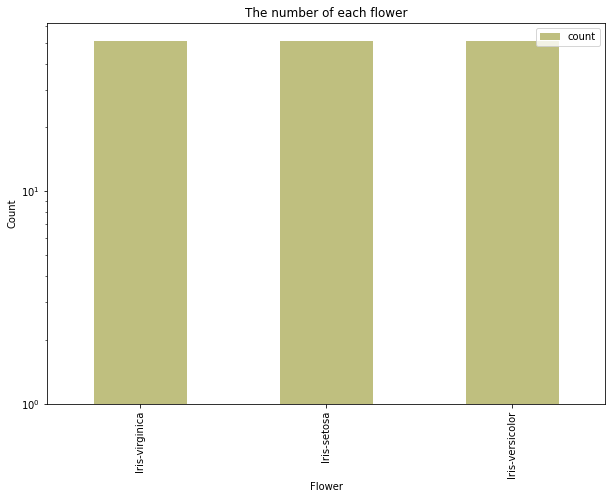

In [ ]:
pd = df1.toPandas()
pl = pd.plot(kind="bar", 
              x="class", y="count", 
              figsize=(10, 7), log=True, alpha=0.5, color="olive")

pl.set_xlabel("Flower")
pl.set_ylabel("Count")
pl.set_title("The number of each flower")

Running SQL Queries Programmatically

In [ ]:
df.createOrReplaceTempView("flower")

sqlDF = spark.sql("SELECT * FROM flower")
sqlDF.show()

+------------+-----------+------------+-----------+-----------+
|sepal_length|sepal_width|petal_length|petal_width|      class|
+------------+-----------+------------+-----------+-----------+
|         5.1|        3.5|         1.4|        0.2|Iris-setosa|
|         4.9|        3.0|         1.4|        0.2|Iris-setosa|
|         4.7|        3.2|         1.3|        0.2|Iris-setosa|
|         4.6|        3.1|         1.5|        0.2|Iris-setosa|
|         5.0|        3.6|         1.4|        0.2|Iris-setosa|
|         5.4|        3.9|         1.7|        0.4|Iris-setosa|
|         4.6|        3.4|         1.4|        0.3|Iris-setosa|
|         5.0|        3.4|         1.5|        0.2|Iris-setosa|
|         4.4|        2.9|         1.4|        0.2|Iris-setosa|
|         4.9|        3.1|         1.5|        0.1|Iris-setosa|
|         5.4|        3.7|         1.5|        0.2|Iris-setosa|
|         4.8|        3.4|         1.6|        0.2|Iris-setosa|
|         4.8|        3.0|         1.4| 

In [ ]:
sqlDF = spark.sql("SELECT * FROM flower WHERE sepal_length > 5")
sqlDF.show()

+------------+-----------+------------+-----------+-----------+
|sepal_length|sepal_width|petal_length|petal_width|      class|
+------------+-----------+------------+-----------+-----------+
|         5.1|        3.5|         1.4|        0.2|Iris-setosa|
|         5.4|        3.9|         1.7|        0.4|Iris-setosa|
|         5.4|        3.7|         1.5|        0.2|Iris-setosa|
|         5.8|        4.0|         1.2|        0.2|Iris-setosa|
|         5.7|        4.4|         1.5|        0.4|Iris-setosa|
|         5.4|        3.9|         1.3|        0.4|Iris-setosa|
|         5.1|        3.5|         1.4|        0.3|Iris-setosa|
|         5.7|        3.8|         1.7|        0.3|Iris-setosa|
|         5.1|        3.8|         1.5|        0.3|Iris-setosa|
|         5.4|        3.4|         1.7|        0.2|Iris-setosa|
|         5.1|        3.7|         1.5|        0.4|Iris-setosa|
|         5.1|        3.3|         1.7|        0.5|Iris-setosa|
|         5.2|        3.5|         1.5| 